<a href="https://colab.research.google.com/github/camila-alves-ferreira/Analise-de-dados-com-Python-e-Pandas/blob/main/Aula2_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabalhando com planilhas do Excel


In [226]:
from google.colab import drive

In [227]:
drive.mount = ("/content/drive/")

In [228]:
# Importando a biblioteca
import pandas as pd

In [229]:
# Leitura dos arquivos
df1 = pd.read_excel("/content/drive/MyDrive/Arquivo Analise com Pandas/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Arquivo Analise com Pandas/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Arquivo Analise com Pandas/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Arquivo Analise com Pandas/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Arquivo Analise com Pandas/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Salvador.xlsx")

In [230]:
# Reunindo todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [231]:
# Exibição as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [232]:
# Exibição das 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [233]:
# Uma amostra do conjunto de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
166,Natal,2019-01-02,111.72,1035,3
62,Natal,2018-02-10,793.00,854,4
165,Natal,2019-01-02,11.54,1037,1
203,Salvador,2019-01-02,37.75,1035,2
40,Fortaleza,2019-02-13,19.13,1002,4


In [234]:
# Verificar o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [235]:
# Alterando o tipo de dado de cada coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [236]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [237]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


Tratando valores faltantes


In [238]:
# Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [239]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
75,Salvador,2019-01-01,155.52,1034,1
178,Natal,2019-01-02,39.28,1037,3
133,Recife,2019-03-02,14.67,980,7
93,Natal,2019-01-02,15.58,1037,1
93,Fortaleza,2019-01-01,35.25,1003,5
101,Recife,2019-01-01,172.55,983,7
89,Recife,2019-01-01,18.11,980,3
125,Fortaleza,2019-03-02,37.60,983,4
17,Salvador,2019-02-14,158.66,1037,1
201,Natal,2019-01-02,86.61,1036,1


In [240]:
# Remover linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all",inplace=True)

Criando novas colunas

In [241]:
# Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [242]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [243]:
# Retornando a maior Receita
df["Receita"].max()

3544.0

In [244]:
# Retornando a maior Receita
df["Receita"].min()

3.34

In [245]:
# As 3 lojas que tiveram as maiores Receitas
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.00,853,4,"3,544.00"
51,Natal,2018-01-21,859.00,852,4,"3,436.00"
55,Natal,2019-01-08,859.00,854,4,"3,436.00"


In [246]:
# As 3 lojas que tiveram as menores Receitas
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [247]:
# Soma da Receita por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju                48,748.25
Fortaleza              37,913.97
Natal                 167,227.52
Recife                 51,936.51
Salvador               40,596.73
Name: Receita, dtype: float64

In [248]:
# Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.00,853,4,"3,544.00"
55,Natal,2019-01-08,859.00,854,4,"3,436.00"
51,Natal,2018-01-21,859.00,852,4,"3,436.00"
30,Natal,2018-10-02,856.00,853,4,"3,424.00"
41,Natal,2018-05-20,835.00,852,4,"3,340.00"
38,Natal,2018-02-25,828.00,852,4,"3,312.00"
10,Natal,2018-10-27,828.00,852,4,"3,312.00"
69,Natal,2019-03-24,817.00,852,4,"3,268.00"
62,Natal,2018-02-10,793.00,854,4,"3,172.00"
52,Natal,2018-04-27,778.00,854,4,"3,112.00"


Trabalhando com datas


In [249]:
# Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [250]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [251]:
# Transformando a coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [252]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [253]:
# Agrupamento para calcular a Receita Anual
df.groupby(df["Data"].dt.year)["Receita"].sum()


Data
2018             118,176.53
2019             228,246.45
Name: Receita, dtype: float64

In [254]:
# Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [255]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
102,Aracaju,2018-01-01,7.29,1523,1,7.29,2018
51,Aracaju,2018-01-01,40.58,1522,6,243.48,2018
140,Natal,2019-01-02,20.79,1036,2,41.58,2019
79,Recife,2019-01-01,14.53,983,6,87.18,2019
36,Aracaju,2018-01-01,37.99,1523,8,303.92,2018


In [256]:
# Extraindo o mês e o dia
df["Mes_venda"], df["Dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [257]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_venda,Dia_venda
45,Aracaju,2018-01-01,131.12,1523,5,655.60,2018,1,1
116,Aracaju,2018-01-01,48.44,1522,4,193.76,2018,1,1
66,Fortaleza,2019-01-01,35.11,1005,6,210.66,2019,1,1
55,Salvador,2019-01-01,36.62,1036,1,36.62,2019,1,1
42,Fortaleza,2019-01-01,38.71,1004,5,193.55,2019,1,1


In [258]:
# Retornando a data de venda mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [259]:
# Calculando a diferença de dias
df["Diferenca_dias"] = df["Data"] - df["Data"].min()

In [260]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_venda,Dia_venda,Diferenca_dias
16,Natal,2018-07-01,298.00,854,3,894.00,2018,7,1,181 days
51,Natal,2018-01-21,859.00,852,4,"3,436.00",2018,1,21,20 days
20,Salvador,2019-01-01,33.97,1034,3,101.91,2019,1,1,365 days
141,Natal,2019-01-02,9.08,1036,1,9.08,2019,1,2,366 days
224,Salvador,2019-01-02,178.30,1035,3,534.90,2019,1,2,366 days


In [261]:
# Criando a coluna de trimestre
df["Trimestre_venda"] = df["Data"].dt.quarter

In [262]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_venda,Dia_venda,Diferenca_dias,Trimestre_venda
216,Natal,2019-01-02,5.82,1035,1,5.82,2019,1,2,366 days,1
173,Natal,2019-01-02,31.77,1034,2,63.54,2019,1,2,366 days,1
30,Salvador,2019-01-01,47.96,1034,2,95.92,2019,1,1,365 days,1
89,Aracaju,2018-01-01,10.15,1523,7,71.05,2018,1,1,0 days,1
63,Recife,2019-01-01,37.95,980,2,75.90,2019,1,1,365 days,1


In [263]:
# Filtrando as vendas do mês de Março de 2019
vendas_marco_2019 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [264]:
vendas_marco_2019.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_venda,Dia_venda,Diferenca_dias,Trimestre_venda
114,Salvador,2019-03-02,25.52,1034,1,25.52,2019,3,2,425 days,1
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
139,Fortaleza,2019-03-02,141.16,980,7,988.12,2019,3,2,425 days,1
46,Natal,2019-03-26,753.00,853,2,"1,506.00",2019,3,26,449 days,1
45,Natal,2019-03-11,431.00,852,3,"1,293.00",2019,3,11,434 days,1
118,Fortaleza,2019-03-02,17.70,981,5,88.50,2019,3,2,425 days,1
121,Recife,2019-03-02,41.55,981,3,124.65,2019,3,2,425 days,1
112,Recife,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
126,Recife,2019-03-02,41.87,980,8,334.96,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1


Visualização de dados

In [265]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

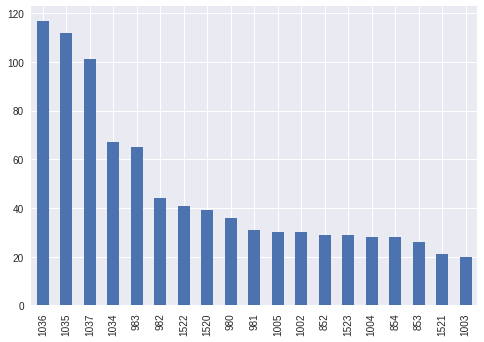

In [266]:
# Gráfico de barras
df["LojaID"].value_counts().plot.bar()

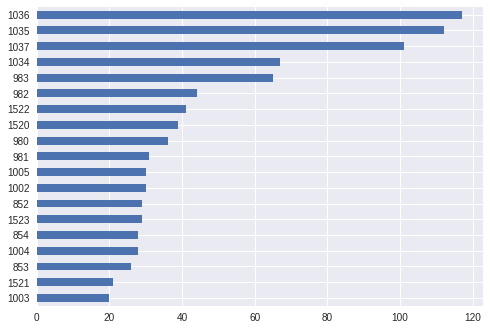

In [267]:
# Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

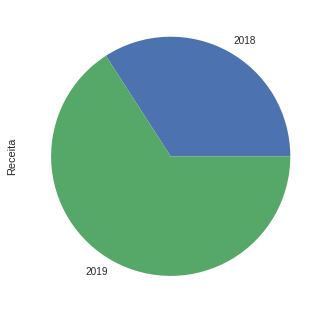

In [268]:
# Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [269]:
# Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

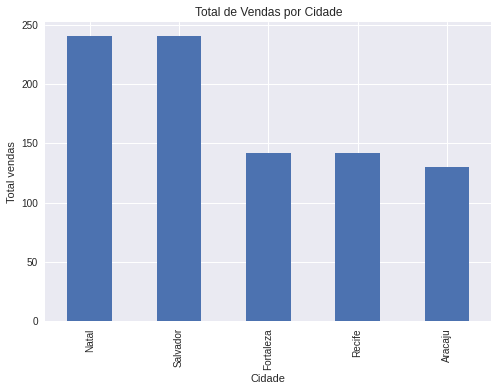

In [270]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de Vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

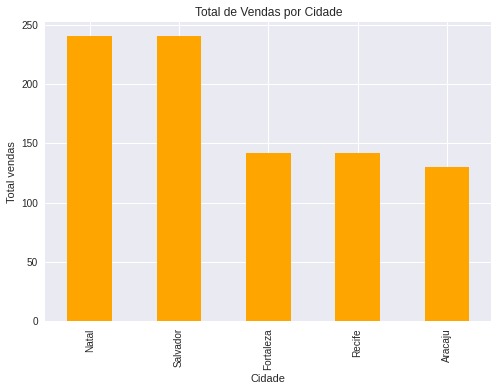

In [271]:
# Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total de Vendas por Cidade", color="orange")
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

In [272]:
# Alterando o estilo
plt.style.use("ggplot")

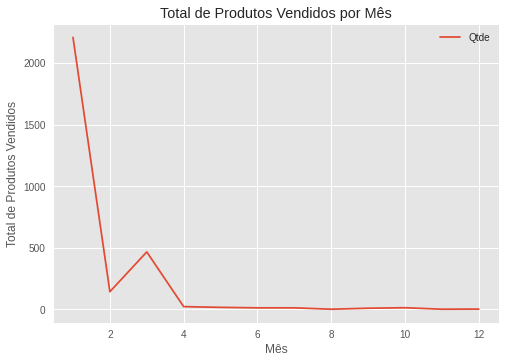

In [273]:
df.groupby(df["Mes_venda"])["Qtde"].sum().plot(title="Total de Produtos Vendidos por Mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend();

In [274]:
df.groupby(df["Mes_venda"])["Qtde"].sum()

Mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [275]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

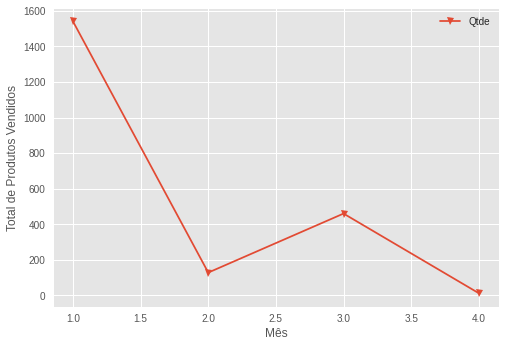

In [276]:
# Total de produtos vendidos por mês
df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend();

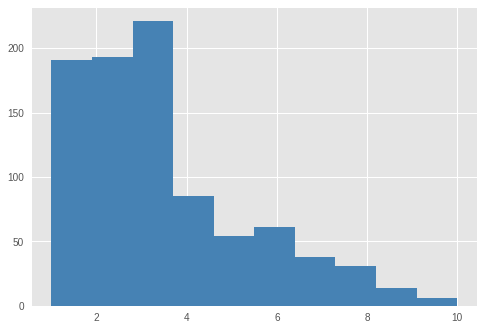

In [277]:
# Histograma
plt.hist(df["Qtde"], color="steelblue");

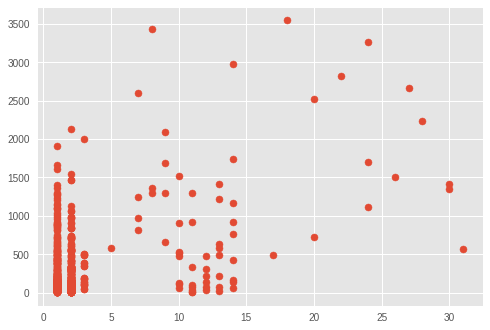

In [278]:
# Gráfico de Dispersão
plt.scatter(x=df_2019["Dia_venda"], y=df_2019["Receita"]);

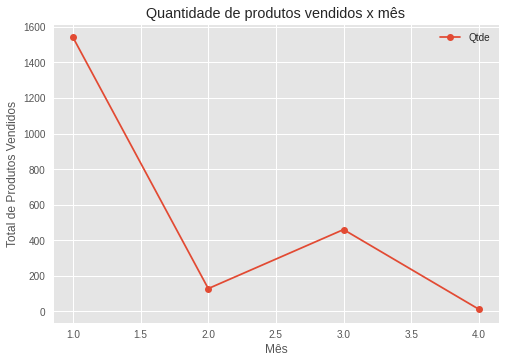

In [279]:
# Salvando em png
df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend();
plt.savefig("grafico QTDE x MES.png")

In [280]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [281]:
# Upload do arquivo
from google.colab import drive
drive.mount = ("/content/drive")

In [282]:
# Criando nosso DataFrame
df = pd.read_excel("/content/drive/MyDrive/Arquivo Analise com Pandas/Cusro_Python_Pandas_Digital_Innovation-master/datasets/AdventureWorks.xlsx")

In [283]:
# Visualizando as primeiras 5 linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [284]:
# Quantidade de linhas e colunas
df.shape

(904, 16)

In [285]:
# Verificando os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [286]:
# Receita Total
df["Valor Venda"].sum()

5984606.1426

In [287]:
# Custo Total
df["Custo"] = df["Custo Unitário"].mul(df["Quantidade"]) #criando a coluna de custo

In [288]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48"


In [289]:
round(df["Custo"].sum(), 2)

2486783.05

In [290]:
# Agora que temos a receita, o custo e o total, podemos achar o lucro total
# Vamos criar uma coluna de Lucro que será Receita - Custo
df["Lucro"] = df["Valor Venda"] - df["Custo"]

In [291]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52"


In [292]:
# Lucro Total
round(df["Lucro"].sum(), 2)

3497823.09

In [293]:
# Criando uma coluna com total de dias para enviar o produto
df["Tempo_Envio"] = df["Data Envio"] - df["Data Venda"]

In [294]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20 days


Agora, para sabermos a média de tempo de envio de cada marca, precisamos transformar a coluna Tempo_Envio em numérica


In [295]:
# Extraindo apenas os dias
df["Tempo_Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [296]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [297]:
# Verificando o tipo da coluna Tempo_Envio
df["Tempo_Envio"].dtype

dtype('int64')

In [298]:
# Média de tempo de envio por marca
df.groupby("Marca")["Tempo_Envio"].mean()

Marca
Adventure Works                   8.66
Contoso                           8.47
Fabrikam                          8.51
Name: Tempo_Envio, dtype: float64

Missing Values

In [299]:
# Verificando se temos dados faltantes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_Envio       0
dtype: int64

E se quisermos saber o lucro por ano e por marca?


In [300]:
# Vamos agrupar por ano e por ma"rca
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [301]:
pd.options.display.float_format = '{:20,.2f}'.format

In [303]:
# Resetando o index
Lucro_Ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
Lucro_Ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [304]:
# Qual o total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

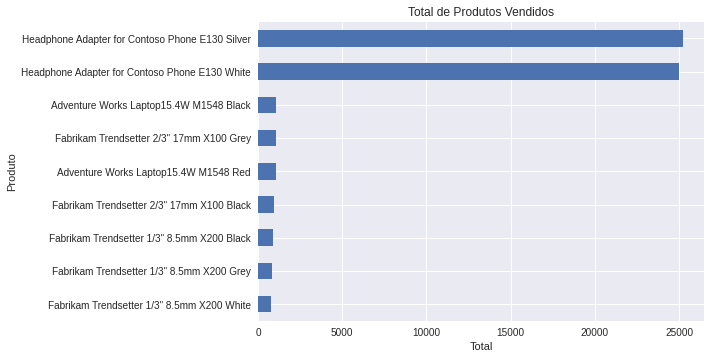

In [305]:
# Gráfico total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total de Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

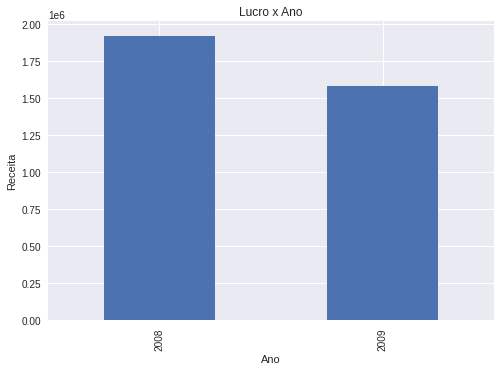

In [308]:
# Gráfico Lucro x Ano
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [306]:
# Lucro por ano
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [309]:
# Selecionando apenas as vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [310]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


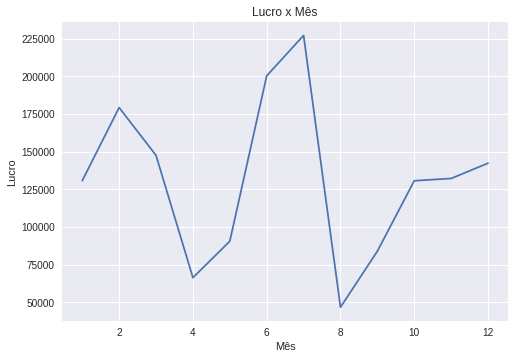

In [311]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

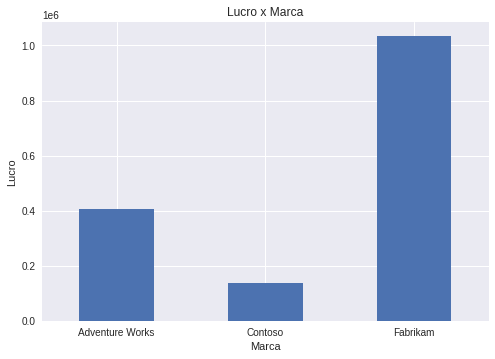

In [315]:
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

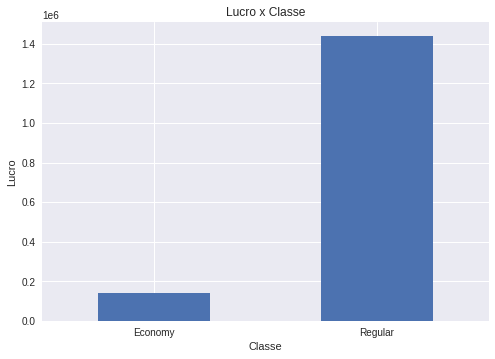

In [316]:
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

In [317]:
df["Tempo_Envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_Envio, dtype: float64

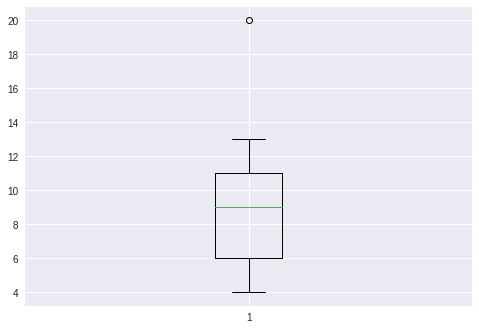

In [318]:
# Gráfico de Boxplot
plt.boxplot(df["Tempo_Envio"]);

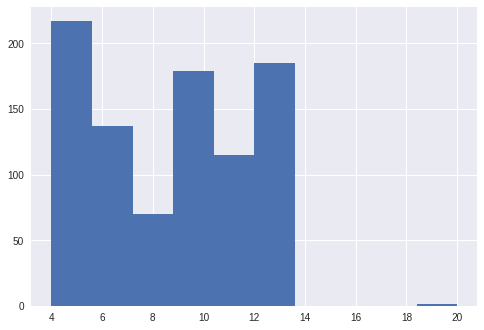

In [319]:
# Histograma
plt.hist(df["Tempo_Envio"]);

In [321]:
# Tempo mínimo de envio
df["Tempo_Envio"].min()

4

In [322]:
# Tempo máximo de envio
df["Tempo_Envio"].max()

20

In [323]:
# Identificando o outlier
df[df["Tempo_Envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [324]:
df.to_csv("df_vendas_novo.csv", index=False)